In [31]:
import arviz as az
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use("plotting.mplstyle")
import numpy as np
import sys
sys.path.append("./../code/")
from tqdm import tqdm
import glob,json

cbbh = '#1f78b4'
cnsbh = '#33a02c'
cbns = '#e31a1c'
cmisc = '#6a3d9a'

In [32]:
ref_efficiency_bbh = 0.0011009853783046646
ref_efficiency_bbh_2 = 0.0006770517089803911
ref_efficiency_bns = 0.016052332309165637
ref_efficiency_nsbh = 0.011199316130953239

n_bbh_ref1 = 3000
n_bbh_ref2 = 1000
n_bns_ref = 3000
n_nsbh_ref = 3000

std_bbh_ref1 = np.sqrt(ref_efficiency_bbh/n_bbh_ref1)
std_bbh_ref2 = np.sqrt(ref_efficiency_bbh_2/n_bbh_ref2)
std_bns_ref = np.sqrt(ref_efficiency_bns/n_bns_ref)
std_nsbh_ref = np.sqrt(ref_efficiency_nsbh/n_nsbh_ref)

In [33]:
# Read summary statistics
results = []
files = np.sort(glob.glob('./../data/trained_networks/job_*_ks.json'))
print(len(files))
nTrials = len(files)
for f in files:
    with open(f,'r') as jf:
        test = json.load(jf)
    results.append(test)
    
bbh_f1 = np.array([results[i]['BBH']['det_efficiency'] for i in range(nTrials)])
bbh_f2 = np.array([results[i]['alt_pop_1']['det_efficiency'] for i in range(nTrials)])
bns_f1 = np.array([results[i]['BNS']['det_efficiency'] for i in range(nTrials)])
nsbh_f1 = np.array([results[i]['NSBH']['det_efficiency'] for i in range(nTrials)])

scaled_bbh_f1_residuals = np.abs(bbh_f1-ref_efficiency_bbh)/std_bbh_ref1
scaled_bbh_f2_residuals = np.abs(bbh_f2-ref_efficiency_bbh_2)/std_bbh_ref2
scaled_bns_f1_residuals = np.abs(bns_f1-ref_efficiency_bns)/std_bns_ref
scaled_nsbh_f1_residuals = np.abs(nsbh_f1-ref_efficiency_nsbh)/std_nsbh_ref

full_efficiency_residuals = np.transpose([
    scaled_bbh_f1_residuals,
    scaled_bbh_f2_residuals,
    scaled_bns_f1_residuals,
    scaled_nsbh_f1_residuals
])
max_efficiency_residuals = np.max(full_efficiency_residuals,axis=1)
    
bbh_m = [results[i]['BBH']['m1_source'] for i in range(nTrials)]
bbh_d = [results[i]['BBH']['luminosity_distance'] for i in range(nTrials)]
bbh_inc = [results[i]['BBH']['cos_inclination'] for i in range(nTrials)]
bns_m = [results[i]['BNS']['m1_source'] for i in range(nTrials)]
bns_d = [results[i]['BNS']['luminosity_distance'] for i in range(nTrials)]
bns_inc = [results[i]['BNS']['cos_inclination'] for i in range(nTrials)]
nsbh_m = [results[i]['NSBH']['m1_source'] for i in range(nTrials)]
nsbh_d = [results[i]['NSBH']['luminosity_distance'] for i in range(nTrials)]
nsbh_inc = [results[i]['NSBH']['cos_inclination'] for i in range(nTrials)]

full_p_values = np.transpose([
    bbh_m,
    bbh_d,
    bbh_inc,
    bns_m,
    bns_d,
    bns_inc,
    nsbh_m,
    nsbh_d,
    nsbh_inc,
])
min_logp_values = np.log10(np.min(full_p_values,axis=1))

76


In [34]:
jobs = np.array([int(f.split('/')[-1].split('_')[1]) for f in files])
ind_to_highlight = np.where(jobs==27)[0]

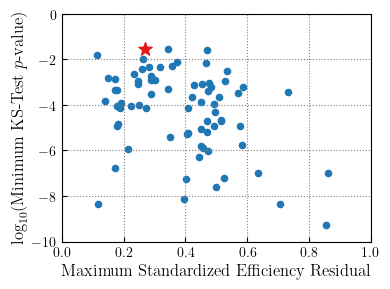

In [35]:
fig,ax = plt.subplots(figsize=(4,3))
ax.scatter(max_efficiency_residuals,min_logp_values,s=20,color=cbbh)

ax.scatter(max_efficiency_residuals[ind_to_highlight],min_logp_values[ind_to_highlight],
           s=100,marker='*',color=cbns)

#secondaryIndices = np.argsort(min_logp_values)[::-1][1:5]
#ax.scatter(max_efficiency_residuals[secondaryIndices],min_logp_values[secondaryIndices],
#           s=75,marker='*',color=cnsbh)

ax.set_xlabel('Maximum Standardized Efficiency Residual')
ax.set_ylabel('$\log_{10}$(Minimum KS-Test $p$-value)')
ax.set_xlim(0,1)
ax.set_ylim(-10,0)

plt.tight_layout()
plt.savefig('figure_09.pdf',bbox_inches='tight',dpi=400)

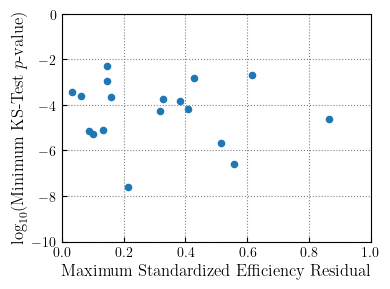

In [26]:
fig,ax = plt.subplots(figsize=(4,3))
ax.scatter(max_efficiency_residuals,min_logp_values,s=20,color=cbbh)

ax.set_xlabel('Maximum Standardized Efficiency Residual')
ax.set_ylabel('$\log_{10}$(Minimum KS-Test $p$-value)')
ax.set_xlim(0,1)
ax.set_ylim(-10,0)

plt.tight_layout()
#plt.savefig('figure_09.pdf',bbox_inches='tight',dpi=400)

In [30]:
jobs = np.array([int(f.split('/')[-1].split('_')[1]) for f in files])
jobs[np.argsort(min_logp_values)[::-1]]

array([11,  6,  3, 17, 18, 14, 16,  8,  9,  0, 10,  2, 12, 19, 13,  7,  4,
        5, 15,  1])

In [18]:
jobs[secondaryIndices]

array([67,  3, 28, 17])

In [20]:
min_logp_values[secondaryIndices],max_efficiency_residuals[secondaryIndices]

(array([-1.56045652, -1.57524654, -1.80526599, -1.99618269]),
 array([0.34409447, 0.46993503, 0.11418469, 0.26199795]))

In [1]:
min_logp_values[ind_to_highlight],max_efficiency_residuals[ind_to_highlight]

NameError: name 'min_logp_values' is not defined

In [13]:
ind = np.where(jobs==33)[0]
ind

array([29])

In [15]:
min_logp_values[29],max_efficiency_residuals[29]

(-3.2324182245081214, 0.4836126017707478)

In [35]:
alt_secondaryIndices = np.argsort(max_efficiency_residuals)[0:5]
jobs[alt_secondaryIndices]

array([28, 50, 71,  4, 45])

In [36]:
min_logp_values[alt_secondaryIndices],max_efficiency_residuals[alt_secondaryIndices]

(array([-1.80526599, -8.346529  , -3.84607852, -2.80488028, -6.77180933]),
 array([0.11418469, 0.11765078, 0.14123784, 0.14987272, 0.17093048]))